<h2> Machine learning part 2</h2>
<br>
Created by: <strong> Tony Do</strong>

Solution found by formula: w =  [[4.0071715  2.98225924]]


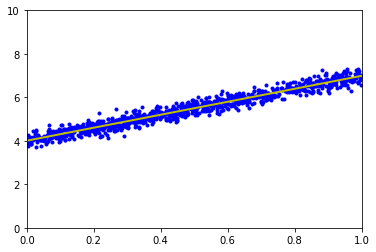

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

<strong> Gradient and loss function</strong>


In [3]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

In [4]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [5]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)


def cost(w):
	return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
	return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [12]:
def GD_momentum(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1])
        w_new = w[-1] - v_new
#         print(np.linalg.norm(grad(w_new))/len(w_new))
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_mm, it_mm) = GD_momentum(w_init, grad, .5, 0.9)
# print(it_mm, w_mm)

In [13]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

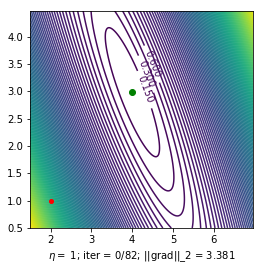

In [17]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def save_gif2(eta, gamma):
    (w, it) = GD_momentum(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    #x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            #animlist = plt.title('labels at selected locations')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax

    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    #fn = 'img2_' + str(eta) + '.gif'
    fn = 'LR_momentum_contours.gif'
    anim1.save(fn, dpi=100, writer='pillow')

eta = 1 
gamma = .9
save_gif2(eta, gamma)
# save_gif2(.1)
# save_gif2(2)

In [18]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)


def cost(w):
	return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
	return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [19]:
def GD_NAG(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1] - gamma*v[-1])
        w_new = w[-1] - v_new
#         print(np.linalg.norm(grad(w_new))/len(w_new))
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_mm, it_mm) = GD_NAG(w_init, grad, .5, 0.9)
# print(it_mm, w_mm)

In [20]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

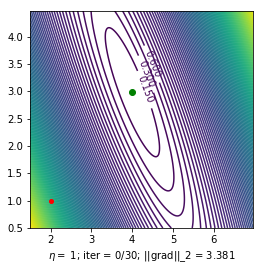

In [23]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif2(eta, gamma):
    (w, it) = GD_NAG(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    #x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            #animlist = plt.title('labels at selected locations')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    #fn = 'img2_' + str(eta) + '.gif'
    fn = 'LR_NAG_contours.gif'
    anim1.save(fn, dpi=100, writer='pillow')

eta = 1 
gamma = .9
save_gif2(eta, gamma)
#save_gif2(.1)
#save_gif2(2)

<h1> Perceptron learning algorithm</h1>

[7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]


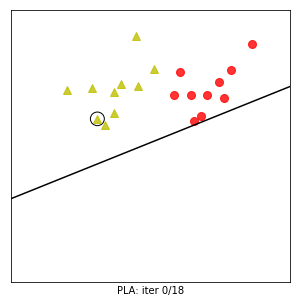

In [8]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)

y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)


def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
# print(w)
# print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'y^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('PLA_visualization.gif', dpi = 100, writer = 'pillow')
    plt.show()
    
viz_alg_1d_2(w)

<h1> Logistic regression algorithm</h1>
<br><br>
We will take an example with simple data 1 dimension. 

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

Declare necessary functions for logistic sigmoid regression

In [2]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


From the result, the output <i>y</i> can be predicted follow the equation: <strong><i> y = sigmoid(-4.1 + 1.55*x)</i></strong>. Therefore, from the data in training set, the result will be:

In [3]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


Plot the result in the graph we can see:

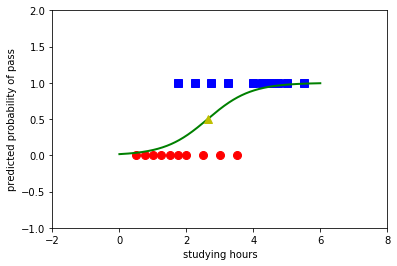

In [4]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

<strong><i>Reference with more dimension of data</i></strong><br><br>
http://galaxy.agh.edu.pl/~vlsi/AI/bias/bias_eng.html

<h1> Softmax regression </h1> 
Example 

In [19]:
import numpy as np 

np.random.seed(1)                          # for fixing random values

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

from scipy import sparse 
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)
print(y)
print(Y)

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

# cost or loss function  
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)
    
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
print(W[-1])

def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)



[2 1]
[[0 0]
 [0 1]
 [1 0]]
4.2290599404677876e-10
[[-0.74048058 -2.89890043  3.27457709]
 [ 2.48311203 -2.66022372  0.71357084]]


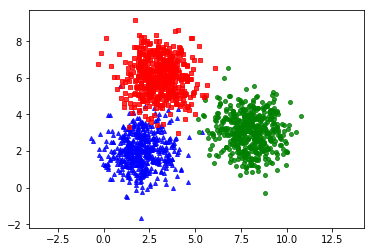

In [23]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T # each column is a datapoint
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    #plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)


In [24]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 8.15782808 -3.76912489 -4.01348247]
 [-0.69845103  1.75733017 -0.54889952]
 [-0.47227297 -0.32920195  2.83720673]]


In [25]:
#Visualize 
# x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
# x_min, x_max = -4, 14
# y_min, y_max = -4, 14

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)


print(XX.shape)

Z = pred(W[-1], XX)

(1, 270400)
(3, 270400)


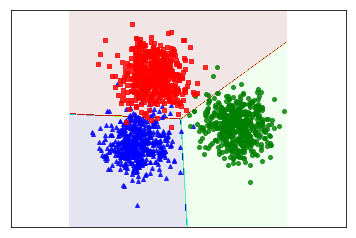

<Figure size 432x288 with 0 Axes>

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1
# plt.pcolormesh(xx, yy, Z, cmap='jet', alpha = .35)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

<h1> Softmwax regression for MNIST dataset</h1>
<br>
We are going to use library in function <strong><i> sklearn.linear_model.LogisticRegression</i></strong> of <strong>sklearn</strong>

In [29]:
# %reset
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score

mntrain = MNIST('./mnist/')
mntrain.load_training()
Xtrain = np.asarray(mntrain.train_images)/255.0
ytrain = np.array(mntrain.train_labels.tolist())

mntest = MNIST('./mnist/')
mntest.load_testing()
Xtest = np.asarray(mntest.test_images)/255.0
ytest = np.array(mntest.test_labels.tolist())

# train
logreg = linear_model.LogisticRegression(C=1e5, 
        solver = 'lbfgs', multi_class = 'multinomial')
logreg.fit(Xtrain, ytrain)

# test
y_pred = logreg.predict(Xtest)
print ("Accuracy: %.2f %%" %(100*accuracy_score(ytest, y_pred.tolist())))

Accuracy: 92.52 %


c:\users\dovan\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<h1> Multi-layer Perceptron and Backpropagation</h1>
<br><br>
First, we will create data for 3 classes which don't have any 2 classes are linearly separable.


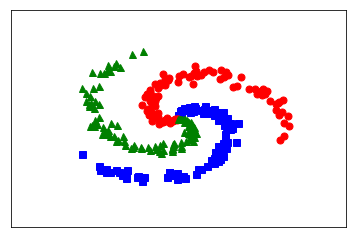

In [31]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

<strong> Calculate Forward and backward function </strong>

In [32]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

iter 0, loss: 1.098425
iter 1000, loss: 0.117425
iter 2000, loss: 0.053413
iter 3000, loss: 0.037152
iter 4000, loss: 0.029389
iter 5000, loss: 0.025529
iter 6000, loss: 0.023063
iter 7000, loss: 0.021333
iter 8000, loss: 0.020003
iter 9000, loss: 0.018991
training accuracy: 99.33 %
(1, 14400)
100


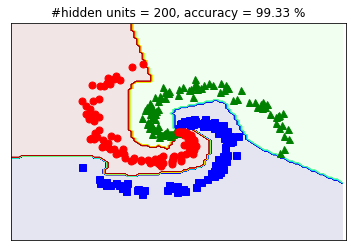

In [37]:
d0 = 2
d1 = h = 200 # size of hidden layer 
d2 = C = 3
# initialize parameters randomely 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# X = X.T # each column of X is a data point 
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate 
for i in range(10000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
    Yhat = softmax(Z2)
    
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %1000 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU 
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    W1 += -eta*dW1 
    b1 += -eta*db1 
    W2 += -eta*dW2
    b2 += -eta*db2 

Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)

# Visualize results 
#Visualize 


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()